# GSOC’24 with QMLHEP 

# Task V: Quantum Graph Neural Network (QGNN) 
 
Kunal Bansal


For this task the solution that I have proposed revolves around creating Quantum feature embeddings for our features. In the past studies, MLP has been used to embed features but it has been observed that the Multi Layer Perceptrons rather overfit on the data instead of generalising. 

Quantum circuits have an exponentially sized feature space in relation to the number of qubits. Consequently, the dimensionality of the data representation |x⟩ grows exponentially whilst the required amount of gates/parameters scales only polynomially. In contrast, the hidden representation of MLPs depends linearly on the number of neurons. Hence, to reproduce the feature space of a quantum circuit with an MLP, exponentially more neurons and parameters are required, which makes both computation and optimization challenging.

The studies shown in the research paper have take Proteins and enzymes data in consideration and the same can be  modeled for using Particle Net's data

The node features of the input graph are embedded with a QML model (top) instead of an MLP (bottom), before being passed to a classical GNN.

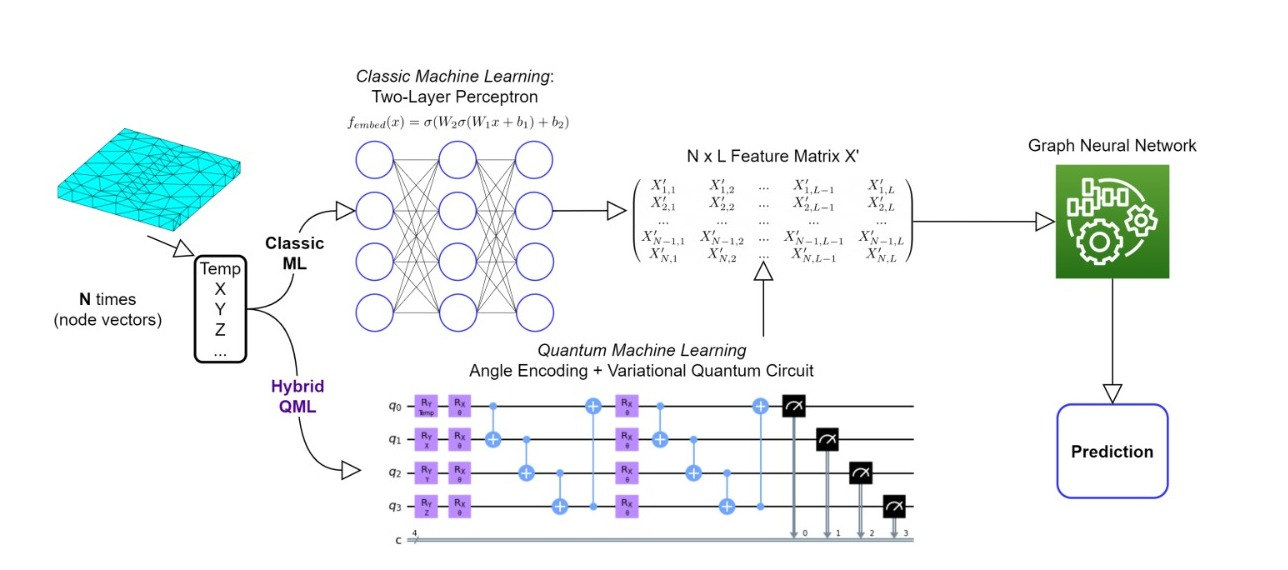


In [3]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 27.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.8 MB/s eta 0:00:00


In [4]:
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.4/317.4 kB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.9 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.0-py3-none-any.whl size=333407 sha256=0e7bb9336a87677f1e6a064bf85c642b27cae0e3bfe8f5f94b2f3c3bee0f0944
  Stored in directory: /root/.cache/pip/wheels/51/4d/71/afa07c4b9ac1d2f59b37ae0f1c86f3f90046ccd75fb274de2f
  Created wheel for ibm-cloud-sdk-cor

In [5]:
pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=95e2a22a271c7a002e45e83d43478d35c62d716e21c05c217a1277d4e861b1c8
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


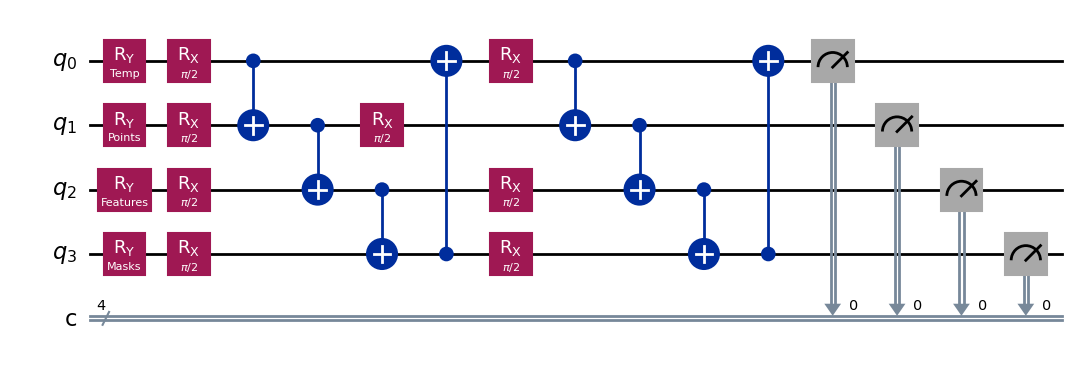

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import QuantumCircuit, Parameter
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

params = [Parameter('Temp'), Parameter('Points'), Parameter('Features'), Parameter('Masks')]
# circuit.ry(params[0], 0)
# circuit.crx(params[1], 0, 1)

circuit.ry(params[0], qreg_q[0])
circuit.ry(params[1], qreg_q[1])
circuit.ry(params[2], qreg_q[2])
circuit.ry(params[3], qreg_q[3])
circuit.rx(pi / 2, qreg_q[1])
circuit.rx(pi / 2, qreg_q[2])
circuit.rx(pi / 2, qreg_q[3])
circuit.rx(pi / 2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[0])
circuit.rx(pi / 2, qreg_q[2])
circuit.rx(pi / 2, qreg_q[3])
circuit.rx(pi / 2, qreg_q[1])
circuit.rx(pi / 2, qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[0])
circuit.measure(qreg_q[2], creg_c[0])
circuit.measure(qreg_q[3], creg_c[0])
circuit.draw('mpl')

**References**

* https://www.quasim-project.de/wp-content/uploads/2023/09/Quantum-Feature-Embeddings-for-Graph-Neural-Networks_HICSS2024.pdf